In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [2]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/'
c1 = ClCatalog.read(path+'c1_p_ls2030_z115.fits', 'c1', full = True)
c2 = ClCatalog.read(path+'c2_p_ls2030_z115.fits', 'c2', full = True)

In [3]:
matching_folder = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/'

In [19]:
output_matched_catalog(matching_folder+'c1_p_ls2030_z115.fits', matching_folder+'c2_p_ls2030_z115.fits',matching_folder+'output_catalog_' + 'p_ls2030_z115' +'.fits', c1, c2, matching_type='cross', overwrite=True)
c_merged_12 = ClCatalog.read(matching_folder+'output_catalog_' + 'p_ls2030_z115' + '.fits', 'merged',  full=True)

In [20]:
c_merged_12

id,cat1_id,cat1_ra,cat1_dec,cat1_z,cat1_mass,cat1_mt_self,cat1_mt_other,cat1_mt_multi_self,cat1_mt_multi_other,cat1_mt_cross,cat2_id,cat2_ra,cat2_dec,cat2_z,cat2_mass,cat2_z_true,cat2_log_mass,cat2_mt_self,cat2_mt_other,cat2_mt_multi_self,cat2_mt_multi_other,cat2_mt_cross,mt_self,mt_other,mt_multi_self,mt_multi_other
str3,bytes6,float64,float64,float32,float64,bytes4,bytes4,bytes9,bytes9,bytes4,bytes11,float64,float64,float32,float32,float32,float64,bytes5,bytes5,bytes11,bytes11,bytes5,object,object,object,object
0,1,61.379151,-39.997938,0.76,151.05119,16,16,16,16,16,16,61.38091042723989,-39.995134303962544,0.7517,167.76317,0.7522554,2.224696636199951,1,1,1,1,1,None,None,[],[]
1,2,61.751903,-39.598934,0.39,34.635494,1448,1448,1448,1448,1448,1448,61.75471518763446,-39.59505755309435,0.38236246,40.765503,0.37716925,1.6102927923202515,2,2,2,2,2,None,None,[],[]
2,3,62.020461,-40.78391,0.76,65.485061,492,492,492,492,492,492,62.01743687819776,-40.78463556638627,0.75057876,56.295067,0.754504,1.7504703998565674,3,3,3,3,3,None,None,[],[]
3,4,62.622221,-40.86162,0.26,35.691697,1912,1912,1912,1912,1912,1912,62.62391149797296,-40.859322057033374,0.251552,32.283737,0.24752603,1.508983850479126,4,4,4,4,4,None,None,[],[]
4,5,61.527245,-40.393481,0.74,49.109488,4404,4404,4404,4404,4404,4404,61.52591531079437,-40.39118186782393,0.730846,22.764635,0.7390331,1.3572607040405273,5,5,5,5,5,None,None,[],[]
5,10,60.878596,-39.859705,0.68,37.570579,3439,3439,3439,3439,3439,3439,60.87741835265462,-39.858968192067366,0.679304,26.410574,0.67976,1.4217778444290161,10,10,10,10,10,None,None,[],[]
6,11,61.029395,-39.780903,0.76,36.01472,1230,1230,1230,1230,1230,1230,61.02810666067245,-39.781242334880226,0.75806963,29.080194,0.7519243,1.463597297668457,11,11,11,11,11,None,None,[],[]
7,12,61.907955,-40.268995,0.65,30.147303,4395,4395,4395,4395,4395,4395,61.91299450100855,-40.270174337648726,0.65890455,23.1155,0.6525463,1.363903284072876,12,12,12,12,12,None,None,[],[]
8,17,61.337421,-41.147773,1.12,57.665355,774,774,774,774,774,774,61.33376537845904,-41.149061500486695,1.1162368,37.638237,1.1166432,1.5756292343139648,17,17,17,17,17,None,None,[],[]


In [49]:
c1_nm = []
c1_nm_mass = []
c1_nm_ra = []
c1_nm_dec = []
c1_nm_z = []
for id in c1['id']:
    if id not in c_merged_12['cat2_mt_cross']:
        cdt = c1[c1['id']==id]
        c1_nm.append(id)
        c1_nm_mass.append(cdt['mass'])
        c1_nm_ra.append(cdt['ra'])
        c1_nm_dec.append(cdt['dec'])
        c1_nm_z.append(cdt['z'])
print('c1 ok')

c1 ok


In [50]:
c1_nm_massl = []
c1_nm_ral = []
c1_nm_decl = []
c1_nm_zl = []
for i in range(len(c1_nm_z)):
    c1_nm_massl.append(c1_nm_mass[i][0])
    c1_nm_ral.append(c1_nm_ra[i][0])
    c1_nm_decl.append(c1_nm_dec[i][0])
    c1_nm_zl.append(c1_nm_z[i][0])

In [51]:
c2_nm = []
c2_nm_mass = []
c2_nm_ra = []
c2_nm_dec = []
c2_nm_z = []
for id in c2['id']:
    if id not in c_merged_12['cat1_mt_cross']:
        cdt = c2[c2['id']==id]
        c2_nm.append(id)
        c2_nm_mass.append(cdt['mass'])
        c2_nm_ra.append(cdt['ra'])
        c2_nm_dec.append(cdt['dec'])
        c2_nm_z.append(cdt['z'])
print('c2 ok')

c2 ok


In [52]:
c2_nm_massl = []
c2_nm_ral = []
c2_nm_decl = []
c2_nm_zl = []
for i in range(len(c2_nm_z)):
    c2_nm_massl.append(c2_nm_mass[i][0])
    c2_nm_ral.append(c2_nm_ra[i][0])
    c2_nm_decl.append(c2_nm_dec[i][0])
    c2_nm_zl.append(c2_nm_z[i][0])

In [53]:
len(c1), len(c2)

(20509, 5852)

In [54]:
len(c_merged_12['cat1_mt_cross']), len(c_merged_12['cat2_mt_cross'])

(5171, 5171)

In [55]:
len(c1_nm), len(c2_nm)

(15338, 681)

In [56]:
frac = Table({'cat_name' : ['AMICO', 'RedMapper'], 'total' : [len(c1), len(c2)],
        'cross_matched' : [str(len(c_merged_12['cat1_mt_cross'])) + '(' + str(int(len(c_merged_12['cat1_mt_cross'])/len(c1)*100)) + '%)', str(len(c_merged_12['cat2_mt_cross'])) + '(' + str(int(len(c_merged_12['cat2_mt_cross'])/len(c2)*100)) + '%)'],
        'not_matched' : [str(len(c1_nm)) + '(' + str(int(len(c1_nm)/len(c1)*100)) +'%)' , str(len(c2_nm)) + '(' + str(int(len(c2_nm)/len(c2)*100)) +'%)']})
display(frac)

cat_name,total,cross_matched,not_matched
str9,int64,str9,str10
AMICO,20509,5171(25%),15338(74%)
RedMapper,5852,5171(88%),681(11%)


Text(0.5, 0, 'ra')

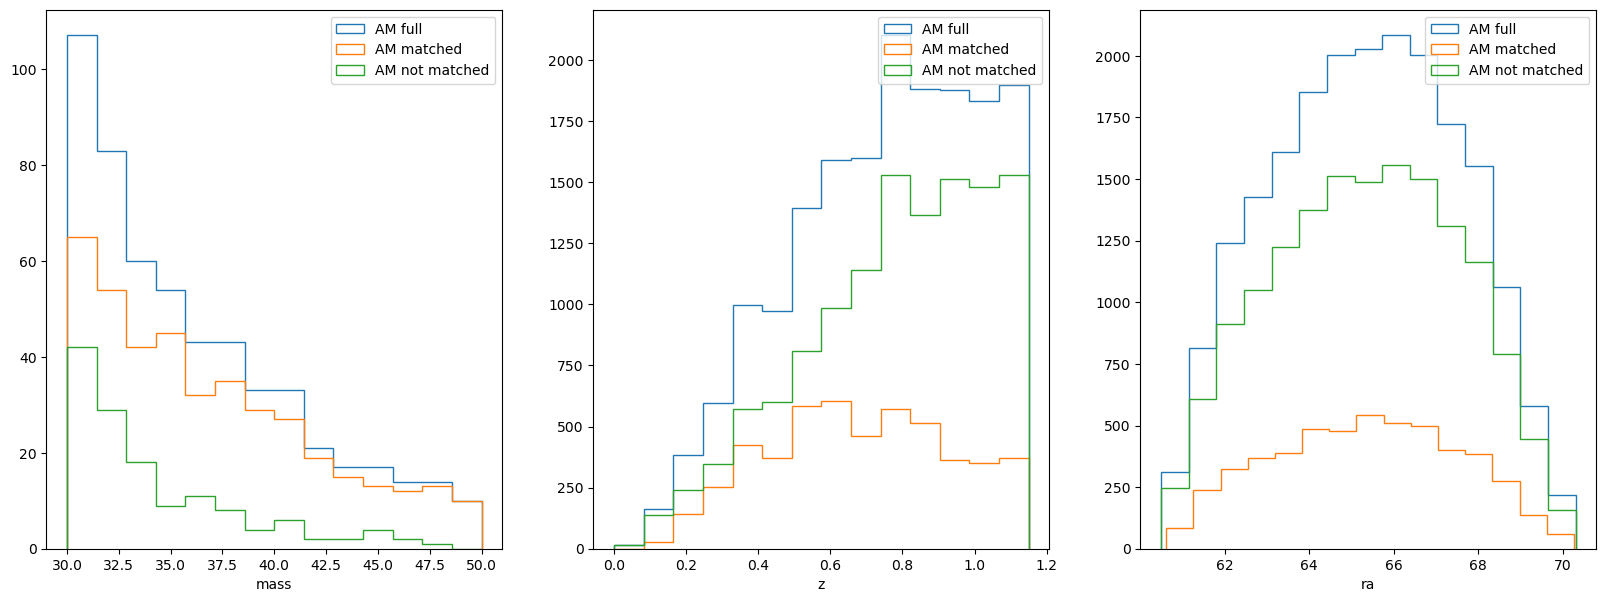

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,7))
ax1.hist(c1['mass'], bins = np.linspace(30,50,15), label = 'AM full', histtype = 'step')
ax1.hist(c_merged_12['cat1_mass'], bins = np.linspace(30,50,15), label = 'AM matched', histtype = 'step')
ax1.hist(c1_nm_massl, bins = np.linspace(30,50,15), label = 'AM not matched', histtype = 'step')
ax1.legend()
ax1.set_xlabel('mass')
ax2.hist(c1['z'], bins = np.linspace(0,1.15,15), label = 'AM full', histtype = 'step')
ax2.hist(c_merged_12['cat1_z'], bins = np.linspace(0,1.15,15), label = 'AM matched', histtype = 'step')
ax2.hist(c1_nm_zl, bins = np.linspace(0,1.15,15), label = 'AM not matched', histtype = 'step')
ax2.legend()
ax2.set_xlabel('z')
ax3.hist(c1['ra'], bins =15, label = 'AM full', histtype = 'step')
ax3.hist(c_merged_12['cat1_ra'], bins = 15, label = 'AM matched', histtype = 'step')
ax3.hist(c1_nm_ral, bins = 15, label = 'AM not matched', histtype = 'step')
ax3.legend()
ax3.set_xlabel('ra')

Text(0.5, 0, 'ra')

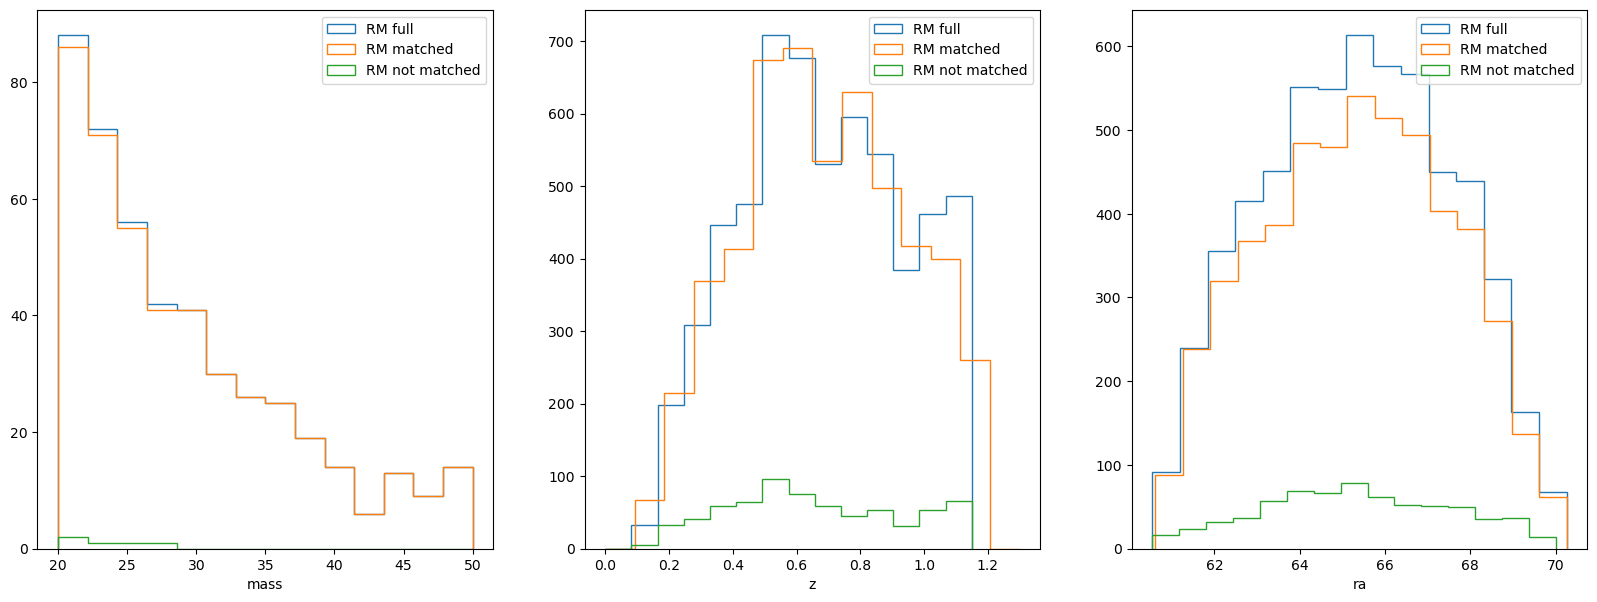

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,7))
ax1.hist(c2['mass'], bins = np.linspace(20,50,15), label = 'RM full', histtype = 'step')
ax1.hist(c_merged_12['cat2_mass'], bins = np.linspace(20,50,15), label = 'RM matched', histtype = 'step')
ax1.hist(c2_nm_massl, bins = np.linspace(20,50,15), label = 'RM not matched', histtype = 'step')
ax1.set_xlabel('mass')
ax1.legend()
ax2.hist(c2['z'], bins = np.linspace(0,1.15,15), label = 'RM full', histtype = 'step')
ax2.hist(c_merged_12['cat2_z'], bins = np.linspace(0,1.3,15), label = 'RM matched', histtype = 'step')
ax2.hist(c2_nm_zl, bins = np.linspace(0,1.15,15), label = 'RM not matched', histtype = 'step')
ax2.legend()
ax2.set_xlabel('z')
ax3.hist(c2['ra'], bins =15, label = 'RM full', histtype = 'step')
ax3.hist(c_merged_12['cat2_ra'], bins = 15, label = 'RM matched', histtype = 'step')
ax3.hist(c2_nm_ral, bins = 15, label = 'RM not matched', histtype = 'step')
ax3.legend()
ax3.set_xlabel('ra')

Text(0, 0.5, '$z_{RedMapper}$')

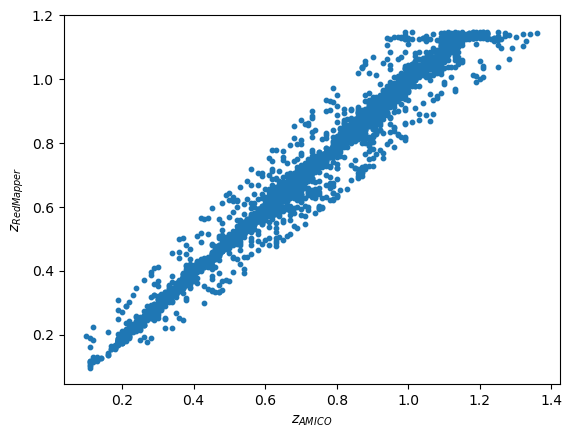

In [59]:
plt.scatter(c_merged_12['cat1_z'],c_merged_12['cat2_z'], s=10)
plt.xlabel('$z_{AMICO}$')
plt.ylabel('$z_{RedMapper}$')

In [60]:
delt = (c_merged_12['cat1_z']-c_merged_12['cat2_z'])/(1+c_merged_12['cat2_z'])

Text(0.5, 0, '$(z_{AM}-z_{RM})/(1+z_{RM})$')

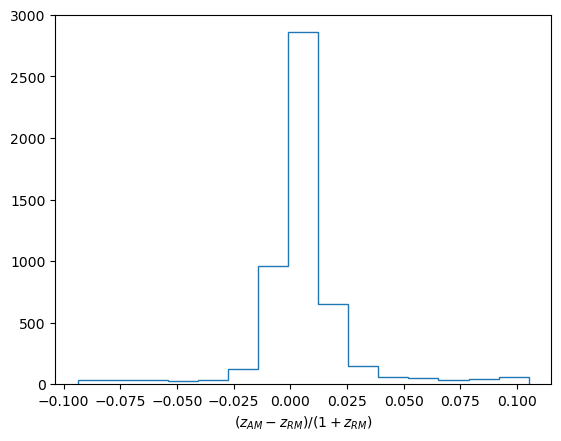

In [61]:
plt.hist(delt, bins = 15, histtype = 'step')
plt.xlabel('$(z_{AM}-z_{RM})/(1+z_{RM})$')

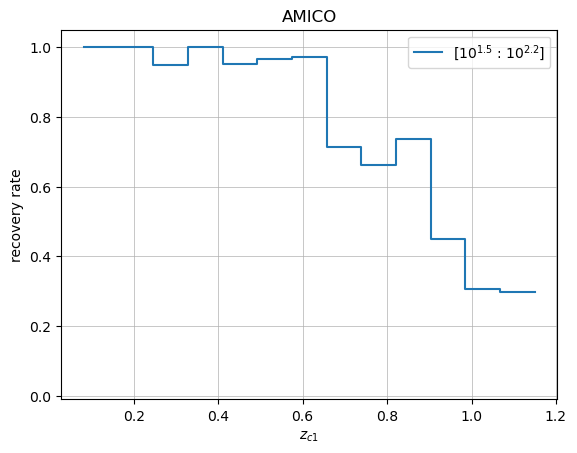

In [42]:
from clevar.match_metrics import recovery
mbins = [min(c1['mass']), max(c1['mass'])]
mbins2 = [min(c2['mass']), max(c2['mass'])]
zbins = np.linspace(0, 1.15, 15)
info = recovery.plot(c1, 'cross', zbins, mbins, shape='steps')
plt.title('AMICO')
plt.show()

Text(0.5, 1.0, 'RedMapper')

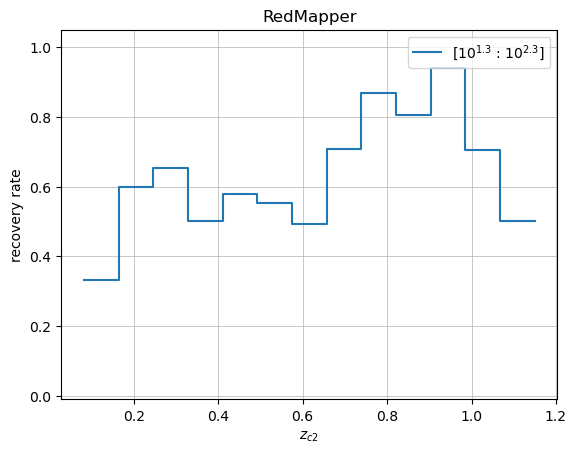

In [43]:
info2 = recovery.plot(c2, 'cross', zbins, mbins2, shape='steps')
plt.title('RedMapper')